# Аналіз та візуалізація даних

## Опис

Аналіз результатів обстеження пацієнтів щодо можливих серцево-судинних захворювань (ССЗ).

### Стуктура даних

| Параметр                                               | Назва змінної | Тип даних  |
|--------------------------------------------------------|---------------|------------|
| Вік                                                    | age | int (дні) |
| Зріст                                                  | height | int (см) |
| Вага                                                   | weight | float (кг) |
| Стать                                                  | gender | binary :) |
| Систолічний кров’яний тиск                             | ap_hi | int |
| Діастолічний артеріальний тиск                         | ap_lo | int |
| Холестерин                                             | cholesterol | 1: норма, 2: вище норми, 3: сильно вище норми |
| Глюкоза                                                | gluc | 1: норма, 2: вище норми, 3: сильно вище норми |
| Паління                                                | smoke | binary |
| AlcohoПрийом алкоголю                                  | alco | binary |
| Фізична активність                                     | active | binary |
| Наявність або відсутність серцево-судинних захворювань | cardio | binary |

Усі значення набору даних були зібрані на момент медичного огляду.

## Підготовка

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
%%capture
%pip install pandas seaborn plotly

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

## Читання даних

In [ ]:
df = pd.read_csv("https://gitlab.com/DmyMi/python-training-examples/-/raw/main/tools/data/cardio.csv", sep=";")

df.head()

## Аналіз даних

**Завдання 1**: Скільки чоловіків і жінок присутні в цьому наборі даних? Значення ознаки `gender` не було надано (не відомо, чи `1` означає жінка чи чоловік), але ми можемо припустити, що чоловіки в середньому вищі за жінок.

In [ ]:
grouped_df_with_mean = df.groupby(['gender'], as_index=False).mean()
height_1 = grouped_df_with_mean['height'][0]
height_2 = grouped_df_with_mean['height'][1]

print("Average height for gender under number 1 is {}".format(height_1))
print("Average height for gender under number 2 is {}".format(height_2))

man_char = 1
woman_char = 2

if (height_1>height_2):
  print("1 - is a man, 2 - is a woman")
elif (height_1<height_2):
  man_char, woman_char = woman_char, man_char
  print("1 - is a woman, 2 - is a man")

num_of_man = df['gender'].value_counts()[man_char]
num_of_woman = df['gender'].value_counts()[woman_char]

print("Number of man is: {}".format(num_of_man))
print("Number of women is: {}".format(num_of_woman))

Average height for gender under number 1 is 161.35561168460356
Average height for gender under number 2 is 169.94789538210054
1 - is a woman, 2 - is a man
Number of man is: 24470
Number of women is: 45530


**Завдання 2**: Яка стать частіше вживає алкоголь - чоловіки чи жінки?

In [ ]:
grouped_df_with_sum = df.groupby(['gender'], as_index=False).sum()

num_of_man_drinkers = grouped_df_with_sum.loc[grouped_df_with_sum['gender'] == man_char, 'alco'].iloc[0]
num_of_woman_drinkers = grouped_df_with_sum.loc[grouped_df_with_sum['gender'] == woman_char, 'alco'].iloc[0]

print("Number of man drinkers: {}".format(num_of_man_drinkers))
print("Number of woman drinkers: {}".format(num_of_woman_drinkers))

if (num_of_man_drinkers > num_of_woman_drinkers):
  print("Men drink more!")
elif (num_of_man_drinkers < num_of_woman_drinkers):
  print("Women drink more!")
else:
  print("Both sexes drink the same")

Number of man drinkers: 2603
Number of woman drinkers: 1161
Men drink more!


**Завдання 3**: Яка різниця між відсотками курців серед чоловіків і жінок (округлено)?

In [ ]:
num_of_man_smokers = grouped_df_with_sum.loc[grouped_df_with_sum['gender'] == man_char, 'smoke'].iloc[0]
num_of_woman_smokers = grouped_df_with_sum.loc[grouped_df_with_sum['gender'] == woman_char, 'smoke'].iloc[0]

print("Number of man smokers: {:.0%}".format(num_of_man_smokers/num_of_man))
print("Number of woman smokers: {:.0%}".format(num_of_woman_smokers/num_of_woman))

Number of man smokers: 22%
Number of woman smokers: 2%


**Завдання 4**: Яка різниця між медіанними значеннями віку для курців і некурців (у місяцях, округлено)? Треба уважно подивитись в чому вимірюється вік (`age`) у цьому наборі даних.

In [ ]:
smokers_df = df.loc[df['smoke'] == 1, 'age']
non_smokers_df = df.loc[df['smoke'] == 0, 'age']
print("Difference between medians of smokers and non-smokers is : ~{} monthes".format(abs(smokers_df.median() - non_smokers_df.median())/30))


Difference between medians of smokers and non-smokers is : ~19.9 monthes


**Завдання 5**: Створіть нову колонку – ІМТ ([індекс маси тіла](https://uk.wikipedia.org/wiki/%D0%86%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D0%BC%D0%B0%D1%81%D0%B8_%D1%82%D1%96%D0%BB%D0%B0)). Для цього розділіть вагу в кілограмах на квадрат зросту в метрах.

Нормальними значеннями ІМТ вважаються від 18,5 до 25.

Використовуючи цю інформацію, дайте відповіть на питання: Чи правда, що у здорових непитущих чоловіків ІМТ ближче до норми, ніж у здорових непитущих жінок?

> Примітка: Відповідь так чи ні, підкріплена даними :)

In [ ]:
df["IMT"] = df["weight"]/((df["height"]/100)*(df["height"]/100))

def calc_good_IMT_for(gender_char):
  return (
      (df["cardio"] == 0) &
      (df["alco"] == 0) &
      (df["gender"] == gender_char) &
      ((18.5 < df["IMT"]) & (df["IMT"] < 25))
      ).sum()

num_of_woman_with_good_IMT = calc_good_IMT_for(woman_char)
num_of_man_with_good_IMT = calc_good_IMT_for(man_char)

perc_of_woman_with_good_IMT = num_of_woman_with_good_IMT/num_of_woman
perc_of_man_with_good_IMT = num_of_man_with_good_IMT/num_of_man

print("Percent of woman with good IMT: {:.0%}".format(perc_of_woman_with_good_IMT))
print("Percent of man with good IMT: {:.0%}".format(perc_of_man_with_good_IMT))

print("There is no significant difference between woman and man good IMT if they are healthy and don't drink alcohol")

Percent of woman with good IMT: 21%
Percent of man with good IMT: 21%
There is no significant difference between woman and man good IMT if they are healthy and don't drink alcohol


## Візуалізація даних

> Можна використовувати або Seaborn або Plotly на ваш вибір.

**Завдання 6**: З нашого попереднього дослідження ми знаємо, що стать кодується значеннями `1` і `2`. Давайте підтвердимо наше попереднє визначення статі графічно, подивившись на середні значення зросту та ваги для кожного значення `gender`.

Створіть *violin plot* за зростом і статтю ([seaborn](https://seaborn.pydata.org/generated/seaborn.violinplot.html)/[plotly](https://plotly.com/python/violin/)).
Для Seaborn можна икористати параметр `hue` для розділення за статтю.

In order for the plot to render correctly, you need to convert your `DataFrame` to *long* format using the `melt()` function from `pandas`. Here is [an example](https://stackoverflow.com/a/41575149/3338479) of this for your reference.

> Щоб графік відтворювався правильно, можливо треба буде перетворити `DataFrame` у *довгий* формат за допомогою функції `melt()`. [Приклад](https://stackoverflow.com/a/41575149/3338479) для довідки.

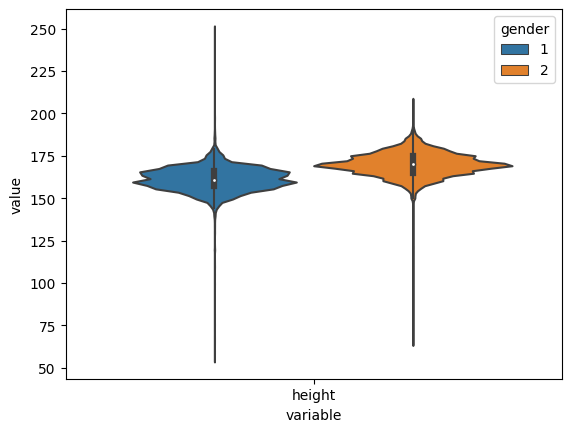

In [ ]:
df_melted = pd.melt(df, value_vars=["height"], id_vars='gender')
sns.violinplot(x='variable', y='value', hue='gender', data=df_melted)
plt.show()


# ***Видно, що середнє значення коробочки для gender=2 вище ніж середнє значення коробочки gender=1, отже наше припущення було вірне, й 2 - це чоловіки, а 1 - це жінки.***

**Завдання 7**: Створіть *count plot* ([seaborn](http://seaborn.pydata.org/generated/seaborn.countplot.html)/[plotly](https://plotly.com/python/histograms/)) із віком на осі `x` і кількістю людей на осі `y`. Ваш результуючий графік повинен мати два стовпці для кожного віку, що відповідає кількості людей для кожного значення `cardio` для цього віку.

Дайте відповідь на питання: Який найменший вік, коли кількість людей із ССЗ перевищує кількість людей без ССЗ?

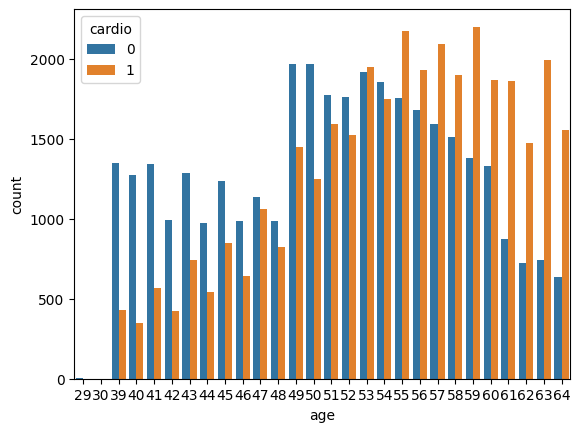

In [ ]:
df_age_in_years= df.copy()
df_age_in_years["age"] = (df["age"]/365).astype(int)

sns.countplot(x="age", hue="cardio", data=df_age_in_years)
#plt.figure(figsize=(20, 6))
plt.show()


# ***Як видно з діаграми, 53 роки це вік, у якому в перше спостерігається перевіщення кількості людей з ССЗ***
